#<font color='yellow'>**BOOK RECOMMENDATION SYSTEM**

In [1]:
#Importing modules
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

#<font color='yellow'>**The Data**
<font color='Red'>
The Book-Crossing dataset comprises 3 files.<br>
● Users :<br>
Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.<br>
● Books : <br>
Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.<br>
● Ratings :<br>
Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

In [2]:
from google.colab import drive

In [3]:
import pandas as pd

# Try specifying a different encoding
users = pd.read_csv('/content/Users.csv', encoding='latin1')
users.head()


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
books = pd.read_csv('/content/Books.csv', encoding='latin1')
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
ratings = pd.read_csv('/content/Ratings.csv',encoding='latin1')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


###<font color='Yellow'>**Dimension of dataset**

In [6]:
# dimension of dataset
print(f'''\t  Book_df shape is {books.shape}
          Ratings_df shape is {ratings.shape}
          Users_df shape is {users.shape}''')

	  Book_df shape is (271360, 8)
          Ratings_df shape is (1048575, 3)
          Users_df shape is (278858, 3)


###<font color='yellow'>**1.)Users_Dataset**

In [7]:
def missing_values(df):
    mis_val=df.isnull().sum()
    mis_val_percent=round(df.isnull().mean().mul(100),2)
    mz_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mz_table=mz_table.rename(
    columns={df.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
    mz_table['Data_type']=df.dtypes
    mz_table=mz_table.sort_values('% of Total Values',ascending=False)
    return mz_table.reset_index()

In [8]:
missing_values(users)

,index,Missing Values,% of Total Values,Data_type
0,Age,110762,39.72,float64
1,User-ID,0,0.00,int64
2,Location,0,0.00,object


<font color='yellow'>Age have around 39% missing values.

<font color='yellow'>**Age Distribution**

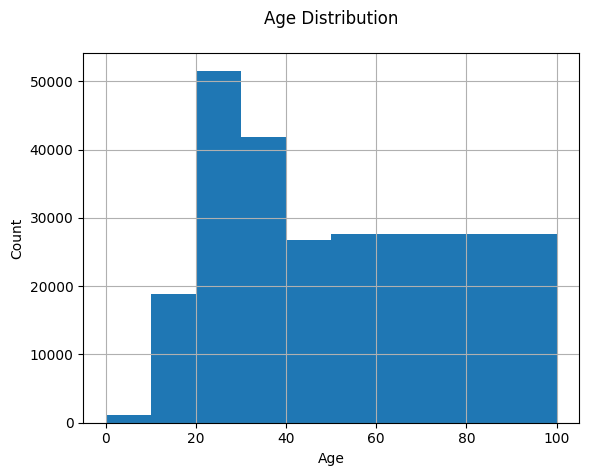

In [9]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<font color='yellow'>The most active users are among those in their 20–30s.

<font color='yellow'>Let's check for outliers in age column

Text(0.5, 1.0, 'Find outlier data in Age column')

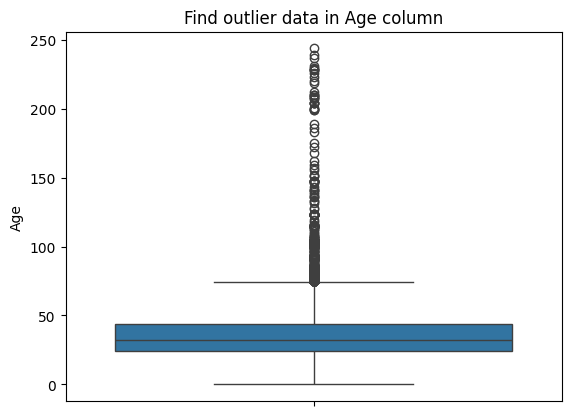

In [10]:
sns.boxplot(y='Age', data=users)
plt.title('Find outlier data in Age column')

In [11]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

<font color='yellow'>Age : 244 <br>
Ok we have Outlier data in Age

<font color='yellow'>Let's find our unique value in Location column

In [12]:
users.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [13]:
users.Location.nunique()

57339

<font color='yellow'>57339 unique Value it's really hard to understand<br>
So lets create column Country

In [14]:
for i in users:
    users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [15]:
users.Country.nunique()

529

In [16]:
#drop location column
users.drop('Location',axis=1,inplace=True)

In [17]:
users.head(2)

,User-ID,Age,Country
0,1,NaN,usa
1,2,18.0,usa


In [18]:
users.isnull().sum()

,0
User-ID,0
Age,110762
Country,369


In [19]:
users['Country']=users['Country'].astype('str')

In [20]:
a=list(users.Country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

<font color='yellow'>Some data has Misspellings Let's correct it.

In [21]:
users['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

Text(0.5, 1.0, 'Count of users Country wise')

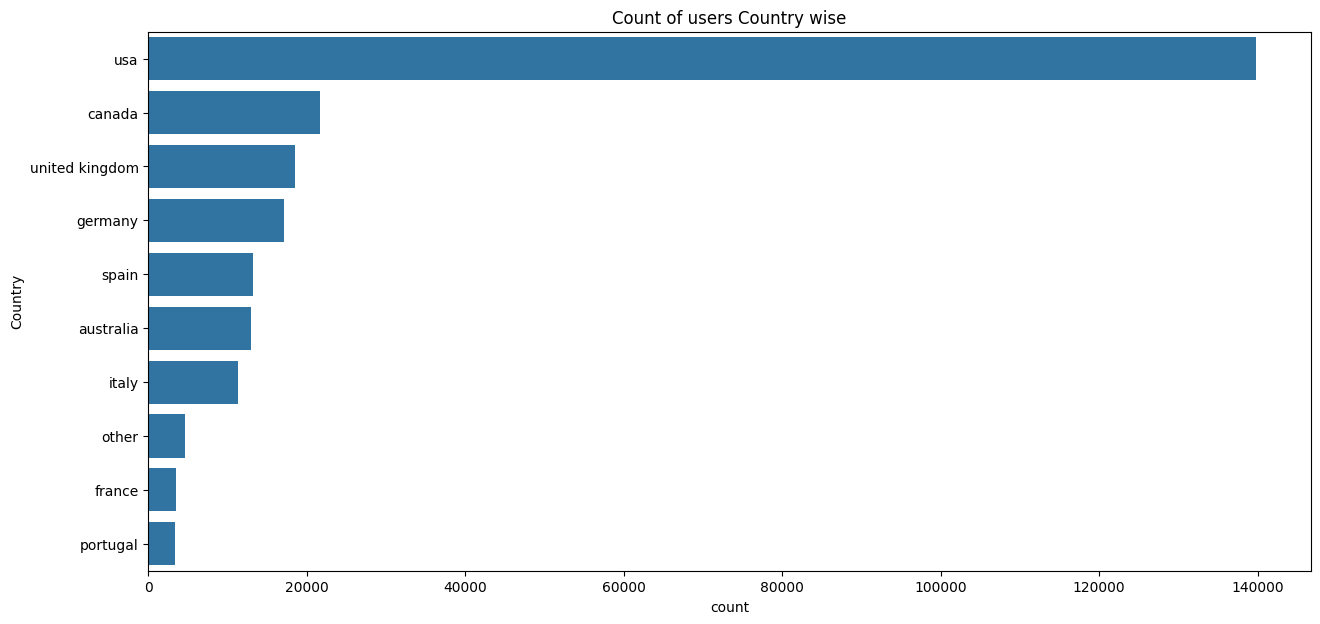

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(y='Country',data=users,order=pd.value_counts(users['Country']).iloc[:10].index)
plt.title('Count of users Country wise')

<font color='yellow'>Most number of users are from USA

<font color='yellow'>Let's treat outliers in users age

Text(0.5, 1.0, 'Age Distribution Plot')

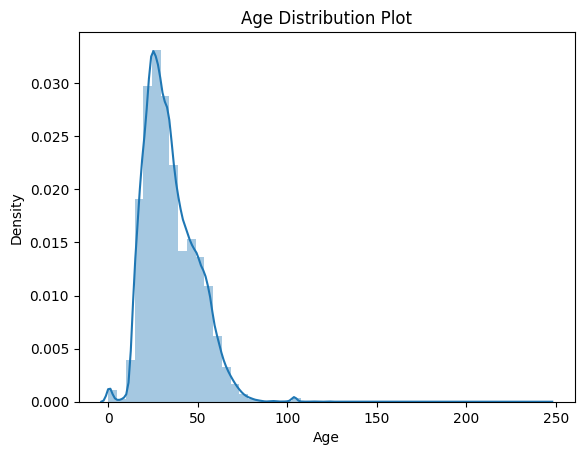

In [23]:
sns.distplot(users.Age)
plt.title('Age Distribution Plot')

<font color='yellow'>Age value's below 5 and above 100 do not make much sense for our book rating case...hence replacing these by NaNs

In [24]:
# outlier data became NaN
users.loc[(users.Age > 100) | (users.Age < 5), 'Age'] = np.nan

In [25]:
users.isna().sum()

,0
User-ID,0
Age,112010
Country,0


<font color='yellow'>Age has positive Skewness (right tail)
so we can use median to fill Nan values,
but for this we don't like to fill Nan value just for one range of age. To handle this we'll use country column to fill Nan.

In [26]:
users['Age'] = users['Age'].fillna(users.groupby('Country')['Age'].transform('median'))

In [27]:
users.isna().sum()

,0
User-ID,0
Age,276
Country,0


<font color='yellow'>Still we have 276 Nan values let's fill them with mean

In [28]:
users['Age'].fillna(users.Age.mean(),inplace=True)

In [29]:
users.isna().sum()

,0
User-ID,0
Age,0
Country,0


#<font color='yellow'>**2.)Books_Dataset**

In [30]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


<font color='yellow'>Top 10 Authors which have written the most books.

Text(0.5, 1.0, 'Top 10 Authors')

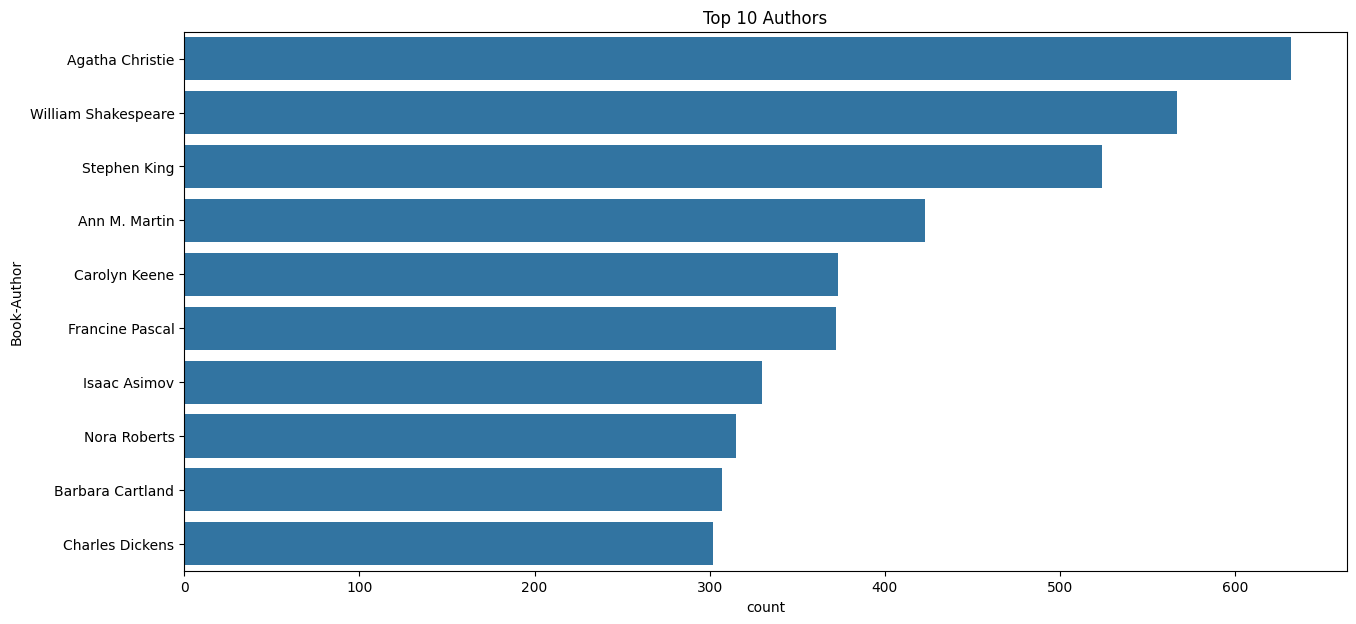

In [31]:
plt.figure(figsize=(15,7))
sns.countplot(y='Book-Author',data=books,order=pd.value_counts(books['Book-Author']).iloc[:10].index)
plt.title('Top 10 Authors')

<font color='yellow'>Top 10 Publisher which have published the most books.

Text(0.5, 1.0, 'Top 10 Publishers')

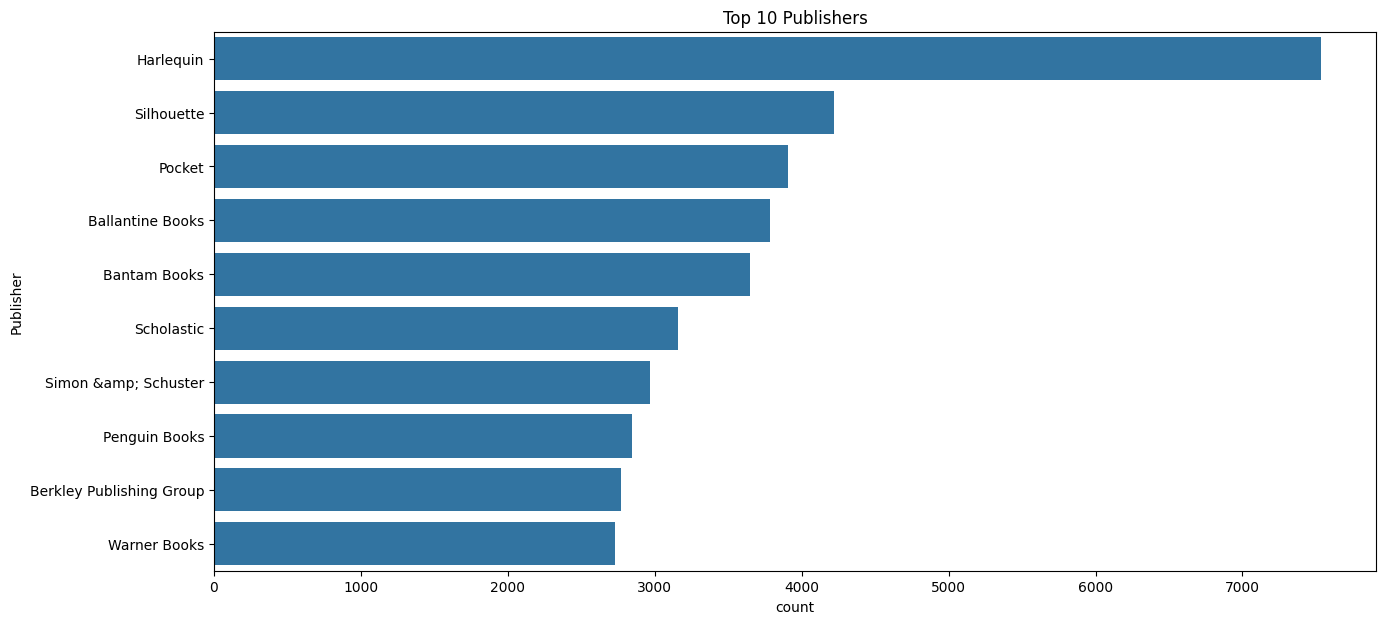

In [32]:
plt.figure(figsize=(15,7))
sns.countplot(y='Publisher',data=books,order=pd.value_counts(books['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

In [33]:
# Convert the 'Year-Of-Publication' column to string type
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype('str')
# Get unique values from the 'Year-Of-Publication' column as a list
a = list(books['Year-Of-Publication'].unique())
# Convert the list to a set to ensure unique values
a = set(a)
# Convert the set back to a list
a = list(a)
# Filter out any None values from the list
a = [x for x in a if x is not None]
# Sort the list in ascending order
a.sort()
# Print the sorted list of unique values
print(a)

['0', '1376', '1378', '1806', '1897', '1900', '1901', '1902', '1904', '1906', '1908', '1909', '1910', '1911', '1914', '1917', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2010', '2011', '2012', '2020', '2021', '2024', '2026', '2030', '2037', '2038', '2050', 'DK Publishing Inc', 'Gallimard']


In [34]:
#investigating the rows having 'DK Publishing Inc' as yearOfPublication
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


<font color='yellow'>As it can be seen from above that there are some incorrect entries in Year-Of-Publication field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as Year-Of-Publication in dataset due to some errors in csv file

In [35]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '0789466953','Book-Author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#rechecking
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]
#corrections done

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN


In [36]:
#investigating the rows having 'Gallimard' as yearOfPublication
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [37]:
#making required corrections as above, keeping other fields intact
books.loc[books.ISBN == '2070426769','Year-Of-Publication'] = 2003
books.loc[books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','Publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"


books.loc[books.ISBN == '2070426769',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [38]:
books['Year-Of-Publication']=pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

print(sorted(books['Year-Of-Publication'].unique()))
#Now it can be seen that yearOfPublication has all values as integers

[0.0, 1376.0, 1378.0, 1806.0, 1897.0, 1900.0, 1901.0, 1902.0, 1904.0, 1906.0, 1908.0, 1909.0, 1910.0, 1911.0, 1914.0, 1917.0, 1919.0, 1920.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2008.0, 2010.0, 2011.0, 2012.0, 2020.0, 2021.0, 2024.0, 2026.0, 2030.0, 2037.0, 2038.0, 2050.0, nan]


<font color='yellow'>The value 0 for Year-Of_Publication is invalid and as this dataset was published in 2004, We have assumed that the years after 2006 to be
invalid and setting invalid years as NaN

In [39]:
books.loc[(books['Year-Of-Publication'] > 2006) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

#replacing NaNs with median value of Year-Of-Publication
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].median()), inplace=True)

In [40]:
#dropping last three columns containing image URLs which will not be required for analysis
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [41]:
books.isna().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2


In [42]:
#exploring 'publisher' column
books.loc[books.Publisher.isnull(),:]
#two NaNs

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN


In [43]:
#Filling Nan of Publisher with others
books.Publisher.fillna('other',inplace=True)

In [44]:
#exploring 'Book-Author' column
books.loc[books['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
118033,751352497,A+ Quiz Masters:01 Earth,NaN,1999.0,Dorling Kindersley
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing


In [45]:
#Filling Nan of Book-Author with others
books['Book-Author'].fillna('other',inplace=True)

In [46]:
books.isna().sum()

,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0


#<font color='yellow'>**3.)Ratings_Dataset**

In [47]:
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5


<font color='yellow'>Ratings dataset should have books only which exist in our books dataset


In [48]:
# Filter the 'ratings' DataFrame to include only rows where the 'ISBN' exists in the 'books' DataFrame
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
# Print the shapes of the original 'ratings' DataFrame and the filtered 'ratings_new' DataFrame
ratings.shape, ratings_new.shape

((1048575, 3), (941112, 3))

<font color='yellow'>It can be seen that many rows having book ISBN not part of books dataset got dropped off

<font color='yellow'>Ratings dataset should have ratings from users which exist in users dataset.

In [49]:
# Print the shape of the dataset before filtering based on 'User-ID'
print("Shape of dataset before dropping", ratings_new.shape)
# Filter 'ratings_new' to include only rows where 'User-ID' exists in the 'users' DataFrame
ratings_new = ratings_new[ratings_new['User-ID'].isin(users['User-ID'])]
# Print the shape of the dataset after filtering based on 'User-ID'
print("Shape of dataset after dropping", ratings_new.shape)

Shape of dataset before dropping (941112, 3)
Shape of dataset after dropping (941112, 3)


<font color='yellow'>It can be seen that no new user was there in ratings dataset.

<font color='yellow'>Let's see how the ratings are distributed

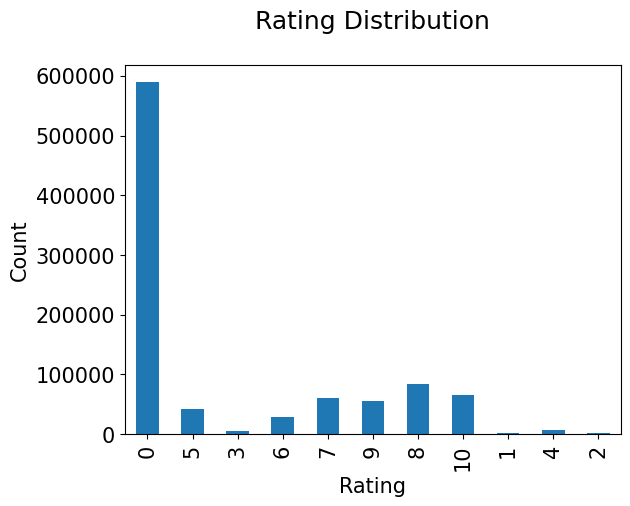

In [50]:
plt.rc("font", size=15)
ratings_new['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

<font color='yellow'>The ratings are very unevenly distributed, and the vast majority of ratings are 0 .As quoted in the description of the dataset - BX-Book-Ratings contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 higher values denoting higher appreciation, or implicit, expressed by 0.Hence segragating implicit and explict ratings datasets

In [51]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]
ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]

In [52]:
print('ratings_explicit dataset shape',ratings_explicit.shape)
print('ratings_implicit dataset',ratings_implicit.shape)

ratings_explicit dataset shape (351857, 3)
ratings_implicit dataset (589255, 3)


<Axes: xlabel='Book-Rating', ylabel='count'>

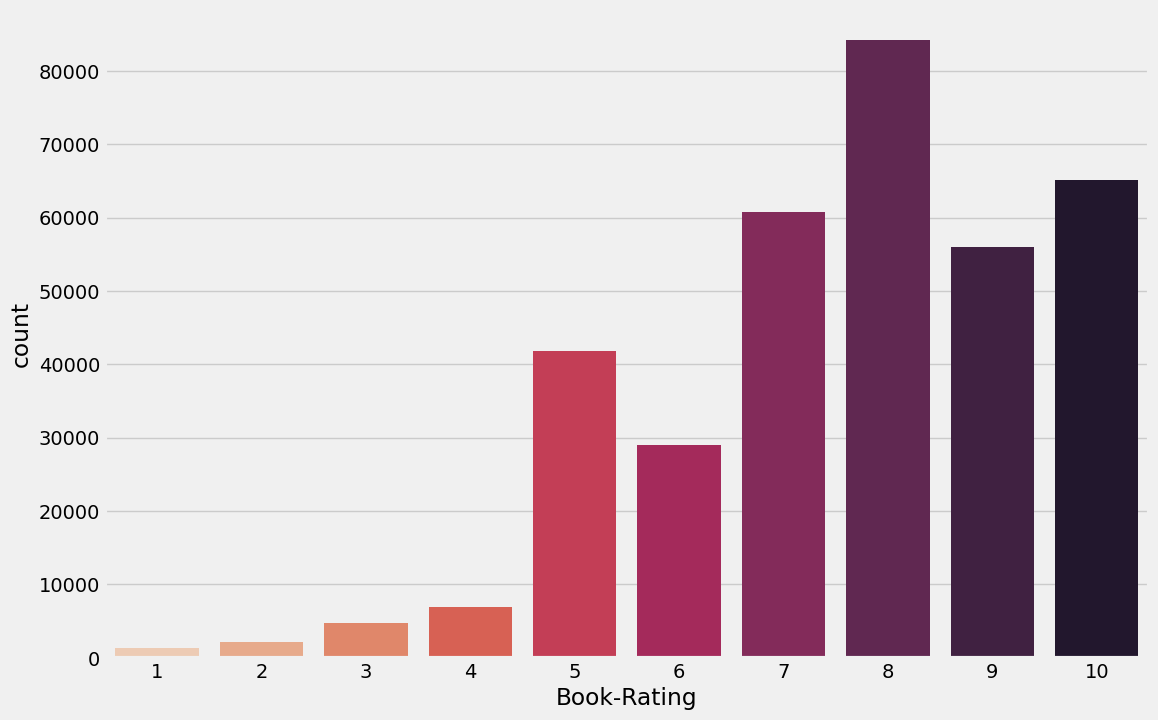

In [53]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings_explicit , x='Book-Rating', palette='rocket_r')

<font color='yellow'>It can be observe that higher ratings are more common amongst users and rating 8 has been rated highest number of times

<font color= 'yellow'>Let's find the top 5 books which are rated by most number of users.

In [54]:
# Create a DataFrame to count the number of ratings for each 'ISBN' in the 'ratings_explicit' DataFrame
rating_count = pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())
# Sort the DataFrame by the count of 'Book-Rating' in descending order and display the top 5 entries
rating_count.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
316666343,635
971880107,526
385504209,452
312195516,354
60928336,292


<font color= 'yellow'>The book with ISBN '0316666343' received the most rating counts. Let’s find out what book it is, and what books are in the top 5.

In [55]:
# Create a DataFrame with the most rated book ISBNs
most_rated_books = pd.DataFrame(
    ['0316666343', '0971880107', '0385504209', '0312195516', '0060928336'],
    index=np.arange(5),
    columns=['ISBN']
)
# Ensure both DataFrames have the same data type for the 'ISBN' column
books['ISBN'] = books['ISBN'].astype(str)
most_rated_books['ISBN'] = most_rated_books['ISBN'].astype(str)

# Merge the most rated books DataFrame with the books DataFrame on the 'ISBN' column
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN', how='inner')

# Display the merged summary
print(most_rated_books_summary)

Empty DataFrame
Columns: [ISBN, Book-Title, Book-Author, Year-Of-Publication, Publisher]
Index: []


<font color= 'yellow'>The book that received the most rating counts in this data set is Rich Shapero’s “Wild Animus”. And there is something in common among these five books that received the most rating counts — they are all novels. So it is conclusive that novels are popular and likely receive more ratings.

In [56]:
# Create column Rating average
ratings_explicit['Avg_Rating']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('mean')
# Create column Rating sum
ratings_explicit['Total_No_Of_Users_Rated']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')

In [57]:
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,155061224,5,5.000000,1
3,276729,052165615X,3,3.000000,1
4,276729,521795028,6,6.000000,1
8,276744,038550120X,7,7.541667,72
16,276747,60517794,9,7.964286,28


####<font color='yellow'>**Merging All Dataset.**

In [58]:
Final_Dataset=users.copy()
Final_Dataset=pd.merge(Final_Dataset,ratings_explicit,on='User-ID')
Final_Dataset=pd.merge(Final_Dataset,books,on='ISBN')

In [59]:
Final_Dataset.head()

,User-ID,Age,Country,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,33.0,canada,2005018,5,7.875,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
1,8,33.0,canada,074322678X,5,5.000,1,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner
2,8,33.0,canada,887841740,5,5.000,1,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press
3,8,33.0,canada,1552041778,5,5.000,1,Jane Doe,R. J. Kaiser,1999.0,Mira Books
4,8,33.0,canada,1567407781,6,6.000,1,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade


In [60]:
missing_values(Final_Dataset)

,index,Missing Values,% of Total Values,Data_type
0,User-ID,0,0.0,int64
1,Age,0,0.0,float64
2,Country,0,0.0,object
3,ISBN,0,0.0,object
4,Book-Rating,0,0.0,int64
5,Avg_Rating,0,0.0,float64
6,Total_No_Of_Users_Rated,0,0.0,int64
7,Book-Title,0,0.0,object
8,Book-Author,0,0.0,object
9,Year-Of-Publication,0,0.0,float64


In [61]:
Final_Dataset.shape

(351857, 11)

#<font color='yellow'>**Popularity Based Filtering**

<font color='white'>As the name suggests Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any book which is usually bought by every new user then there are chances that it may suggest that book to the user who just signed up.<br>
Book weighted avg formula:<br>
Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]<br>
where,<br>
v is the number of votes for the books;<br>
m is the minimum votes required to be listed in the chart;<br>
R is the average rating of the book; and<br>
C is the mean vote across the whole report.<br>
Now we find the values of v,m,R,C.

In [62]:
C= Final_Dataset['Avg_Rating'].mean()
m= Final_Dataset['Total_No_Of_Users_Rated'].quantile(0.90)
Top_Books = Final_Dataset.loc[Final_Dataset['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=7.627439556410701 , m=58.0


(35475, 11)

<font color='white'>Here we used 90th percentile as our cutoff. In other words, for a book to feature in the charts, it must have more votes than at least 90% of the books in the list.<br>
We see that there are 38570 books which qualify to be in this list. Now, we need to calculate our metric for each qualified book. To do this, we will define a function, weighted_rating() and define a new feature score, of which we’ll calculate the value by applying this function to our DataFrame of qualified books:

In [63]:
def weighted_rating(x, m=m, C=C):
    v = x['Total_No_Of_Users_Rated']
    R = x['Avg_Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)


Top_Books['Score'] = Top_Books.apply(weighted_rating,axis=1)


#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

In [64]:
#Keeping only one entry of each book
Top_Books=Top_Books.sort_values('Score', ascending=False).drop_duplicates('ISBN').sort_index()
cm=sns.light_palette('yellow',as_cmap=True)
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

#Printing the top 20 books
Top_Books[['Book-Title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(20).style.background_gradient(cmap=cm)

,Book-Title,Total_No_Of_Users_Rated,Avg_Rating,Score
0,Harry Potter and the Goblet of Fire (Book 4),126,9.230159,8.724954
1,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),285,8.933333,8.712512
2,Harry Potter and the Order of the Phoenix (Book 5),189,9.015873,8.689844
3,Harry Potter and the Prisoner of Azkaban (Book 3),125,9.096000,8.630555
4,Harry Potter and the Prisoner of Azkaban (Book 3),118,9.118644,8.627224
5,To Kill a Mockingbird,195,8.923077,8.626053
6,"The Return of the King (The Lord of the Rings, Part 3)",72,9.402778,8.610704
7,Harry Potter and the Sorcerer's Stone (Book 1),105,9.009524,8.517739
8,"The Two Towers (The Lord of the Rings, Part 2)",80,9.150000,8.510083
9,Harry Potter and the Chamber of Secrets (Book 2),115,8.939130,8.499373


<font color='white'>The Popularity based recommender provide a general chart of recommended books to all the users. They are not sensitive to the interests and tastes of a particular user.

#<font color='yellow'>**Model Based Collaborative Filtering Recommender**
<font color='white'>The goal of the recommender system is to predict user preference for a set of items based on the past experience. Two the most popular approaches are Content-Based and Collaborative Filtering.
<br>Collaborative filtering is a technique used by websites like Amazon, YouTube, and Netflix. It filters out items that a user might like on the basis of reactions of similar users. There are two categories of collaborative filtering algorithms: memory based and model based.
<br>
Model based approach involves building machine learning algorithms to predict user's ratings. They involve dimensionality reduction methods that reduce high dimensional matrix containing abundant number of missing values with a much smaller matrix in lower-dimensional space.
<br>
The goal of this section is to compare SVD and NMF algorithms, try different configurations of parameters and explore obtained results.

In [65]:
import scipy
import math
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

<font color='yellow'>This analysis will focus on book recommendations based on Book-Crossing dataset. To reduce the dimensionality of the dataset and avoid running into memory error we will focus on users with at least 3 ratings and top 10% most frequently rated books.
<br>
The recommender systems will be built using surprise package (Matrix Factorization - based models).

In [66]:
ratings_explicit.rename(columns = {'User-ID':'user_id' ,'ISBN':'isbn' ,'Book-Rating':'book_rating'},inplace=True)

In [67]:
# Set a threshold for the minimum number of ratings a user must have
user_ratings_threshold = 3
# Count the number of ratings for each user in the 'ratings_explicit' DataFrame
filter_users = ratings_explicit['user_id'].value_counts()
# Filter for users who have ratings greater than or equal to the threshold
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()
# Create a new DataFrame containing only the ratings of users meeting the threshold
df_ratings_top = ratings_explicit[ratings_explicit['user_id'].isin(filter_users_list)]
# Print a summary of the filtering operation
print('Filter: users with at least %d ratings\nNumber of records: %d' % (user_ratings_threshold, len(df_ratings_top)))


Filter: users with at least 3 ratings
Number of records: 300470


In [68]:
# Set a threshold percentage for the top most frequently rated books
book_ratings_threshold_perc = 0.1
# Calculate the threshold number of books based on the percentage
book_ratings_threshold = len(df_ratings_top['isbn'].unique()) * book_ratings_threshold_perc
# Identify the list of books (ISBNs) that are in the top threshold of most frequently rated
filter_books_list = df_ratings_top['isbn'].value_counts().head(int(book_ratings_threshold)).index.to_list()
# Filter the DataFrame to include only the ratings of the most frequently rated books
df_ratings_top = df_ratings_top[df_ratings_top['isbn'].isin(filter_books_list)]
# Print a summary of the filtering operation
print('Filter: top %d%% most frequently rated books\nNumber of records: %d' % (book_ratings_threshold_perc * 100, len(df_ratings_top)))


Filter: top 10% most frequently rated books
Number of records: 144922


<font color='yellow'>SVD and NMF models comparison<br>
Singular Value Decomposition (SVD) and Non-negative Matrix Factorization (NMF) are matrix factorization techniques used for dimensionality reduction. Surprise package provides implementation of those algorithms.

In [69]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505164 sha256=9e2786363d8d557cfb00f116a451d15bfbfdb0b2df11425ef87298fafe0e9ea7
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [70]:
from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [71]:
# Create a copy of the filtered ratings DataFrame to preserve the original data
df = df_ratings_top.copy()
# Initialize a Reader object with the specified rating scale (from 1 to 10)
# The Reader class is used by the Surprise library to parse the data for recommendation tasks
reader = Reader(rating_scale=(1, 10))
# Load the data into a Surprise Dataset object using the filtered DataFrame
# Only the 'user_id', 'isbn', and 'book_rating' columns are used for creating the dataset
data = Dataset.load_from_df(df[['user_id', 'isbn', 'book_rating']], reader)

In [72]:
# Initialize the SVD (Singular Value Decomposition) model
# SVD is commonly used in recommendation systems for collaborative filtering
model_svd = SVD()
# Perform cross-validation on the SVD model using the dataset
# 'cv=3' specifies 3-fold cross-validation, splitting the data into 3 subsets
cv_results_svd = cross_validate(model_svd, data, cv=3)
# Convert the cross-validation results into a DataFrame and calculate the mean of each metric
# This provides an average performance summary of the model
pd.DataFrame(cv_results_svd).mean()

,0
test_rmse,1.602486
test_mae,1.241453
fit_time,1.894270
test_time,0.424184


In [73]:
# Initialize the NMF (Non-Negative Matrix Factorization) model
model_nmf = NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=3)
pd.DataFrame(cv_results_nmf).mean()

,0
test_rmse,2.633994
test_mae,2.249576
fit_time,5.024953
test_time,0.285716


<font color='yellow'>
It's clear that for the given dataset much better results can be obtained with SVD approach - both in terms of accuracy and training / testing time.

##<font color='yellow'>**Optimisation of SVD algorithm**<br>
<font color='white'>Grid Search Cross Validation computes accuracy metrics for an algorithm on various combinations of parameters, over a cross-validation procedure. It's useful for finding the best configuration of parameters.
<br>
It is used to find the best setting of parameters:
<br>
n_factors - the number of factors<br>
n_epochs - the number of iteration of the SGD procedure<br>
lr_all - the learning rate for all parameters<br>
reg_all - the regularization term for all parameters<br>
As a result, regarding the majority of parameters, the default setting is the most optimal one. The improvement obtained with Grid Search is very small.

In [74]:
# Define the parameter grid for hyperparameter tuning of the SVD model
# - 'n_factors': Number of latent factors in the matrix factorization
# - 'n_epochs': Number of iterations for optimization
# - 'lr_all': Learning rate for all parameters
# - 'reg_all': Regularization term to prevent overfitting
param_grid = {'n_factors': [80, 100],
              'n_epochs': [5, 20],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.2, 0.4]}
# Initialize a GridSearchCV object for the SVD model
# 'measures' specifies the evaluation metrics ('rmse' and 'mae' in this case)
# 'cv=3' performs 3-fold cross-validation
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
# Fit the GridSearchCV object to the data to find the best combination of hyperparameters
gs.fit(data)
# Print the best RMSE score from the grid search
print(gs.best_score['rmse'])
# Print the combination of hyperparameters that produced the best RMSE score
print(gs.best_params['rmse'])

1.5951871986513755
{'n_factors': 80, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


#<font color='yellow'>Analysis of Collaborative Filtering model results
<font color='white'>In this part, let's examine in detail the results obtained by the SVD model that provided the best RMSE score.

In [75]:
# Split the data into training and testing sets
# 'test_size=0.2' means 20% of the data will be used for testing
trainset, testset = train_test_split(data, test_size=0.2)
model = SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
# Train the SVD model using the training set
model.fit(trainset)
# Generate predictions for the test set
# Each prediction contains details like user ID, item ID, true rating, and predicted rating
predictions = model.test(testset)

In [76]:
# Convert the predictions list into a DataFrame
# The columns include user ID, item ID (ISBN), actual rating, predicted rating, and details of the prediction
df_pred = pd.DataFrame(predictions, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])
# Extract the 'was_impossible' flag from the 'details' column
# This indicates whether a prediction was deemed impossible (e.g., due to lack of data)
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
# Add a column for rounded predicted ratings to make it easier to compare with actual ratings
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
# Calculate the absolute error between the predicted rating and the actual rating
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
# Drop the 'details' column as it is no longer needed
df_pred.drop(['details'], axis=1, inplace=True)
# Display a random sample of 5 rows from the DataFrame
df_pred.sample(5)

,user_id,isbn,actual_rating,pred_rating,impossible,pred_rating_round,abs_err
27695,35931,679457836,1.0,7.401233,False,7.0,6.401233
9353,240113,142002267,7.0,8.002668,False,8.0,1.002668
20502,229741,451167716,8.0,8.110124,False,8.0,0.110124
5733,101851,189205101X,9.0,8.675982,False,9.0,0.324018
7559,200226,312971346,8.0,7.594645,False,8.0,0.405355


<font color='yellow'>Distribution of actual and predicted ratings in the test set
According to the distribution of actual ratings of books in the test set, the biggest part of users give positive scores - between 7 and 10. The mode equals 8 but count of ratings 7, 9, 10 is also noticeable. The distribution of predicted ratings in the test set is visibly different. One more time, 8 is a mode but scores 7, 9 and 10 are clearly less frequent.
<br>
It shows that the recommender system is not perfect and it cannot reflect the real distribution of book ratings.

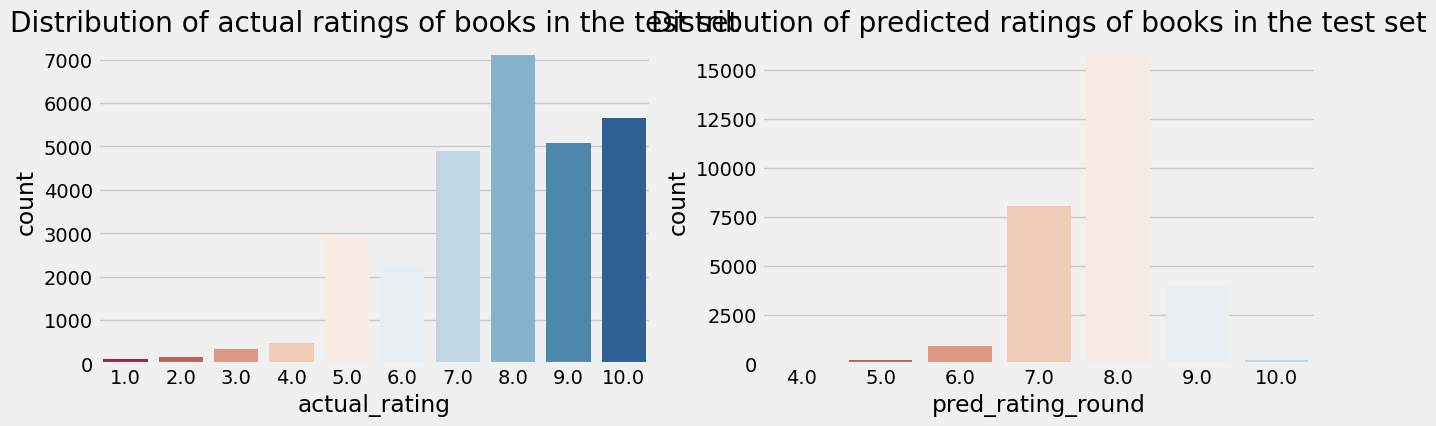

In [77]:
# Create a color palette using the "RdBu" colormap with 10 distinct colors
palette = sns.color_palette("RdBu", 10)
# Create a figure with two subplots arranged in a single row and two columns
# 'figsize=(14, 4)' specifies the overall size of the figure
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
# Plot the distribution of actual ratings in the test set
# - 'x': Column to use for the x-axis (actual ratings)
# - 'data': DataFrame containing the data
# - 'palette': Color palette to use for the bars
# - 'ax': Specific subplot to plot on
sns.countplot(x='actual_rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of actual ratings of books in the test set')
# Plot the distribution of rounded predicted ratings in the test set
sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of predicted ratings of books in the test set')
# Display the plots
plt.show()

<font color='yellow'>**Absolute error of predicted ratings**<br>
The distribution of absolute errors is right-skewed, showing that the majority of errors is small: between 0 and 1. There is a long tail that indicates that there are several observations for which the absolute error was close to 10.
<br>
How good/bad the model is with predicting certain scores? As expected from the above charts, the model deals very well with predicting score = 8 (the most frequent value). The further the rating from score = 8, the higher the absolute error. The biggest errors happen to observations with scores 1 or 2 which indicates that probably the model is predicting high ratings for those observations.

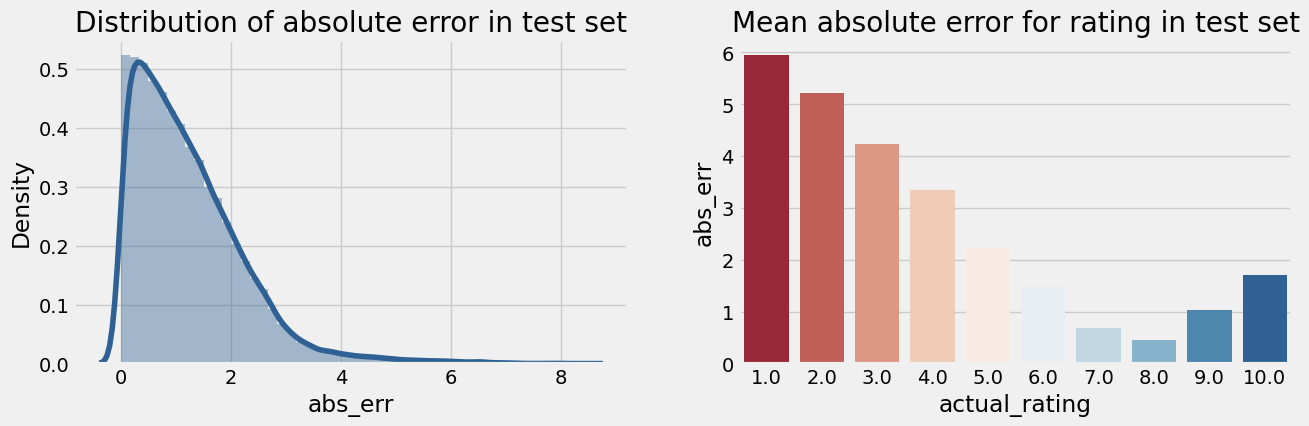

In [78]:
# Group the prediction DataFrame by actual ratings and calculate the mean absolute error for each group
# - 'abs_err': The column containing absolute error values
df_pred_err = df_pred.groupby('actual_rating')['abs_err'].mean().reset_index()
# Create a figure with two subplots arranged in a single row and two columns
# 'figsize=(14, 4)' specifies the overall size of the figure
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
# Plot the distribution of absolute errors in the test set
# - 'color': Specifies the color of the distribution plot
# - 'ax': Specific subplot to plot on
sns.distplot(df_pred['abs_err'], color='#2f6194', ax=ax1)
ax1.set_title('Distribution of absolute error in test set')
# Plot the mean absolute error for each actual rating in the test set
# - 'x': The column for the x-axis (actual ratings)
# - 'y': The column for the y-axis (mean absolute error)
# - 'data': DataFrame containing the grouped data
# - 'palette': Color palette to use for the bars
sns.barplot(x='actual_rating', y='abs_err', data=df_pred_err, palette=palette, ax=ax2)
ax2.set_title('Mean absolute error for rating in test set')
# Display the plots
plt.show()

<font color='yellow'>
Analysis of predicted ratings of a particular user<br>
For this part of the analysis, the user with id 193458 was selected. By analyzing book ratings by this user, it can be noted that he/she likes diverse types of readings: English romantic novels (Pride and Prejudice, Sense and Sensibility), fantasy (Narnia) as well as historical novels (Schindler's List). Among the recommended books there are other works from Narnia's series, two historical novels and one romance which correlates with user's previous preferences.

In [79]:
# Create a copy of the 'books' DataFrame to avoid modifying the original data
df_books = books.copy()
# Rename the columns in 'df_books' for consistency
# - 'ISBN' is renamed to 'isbn' to match the column name in other DataFrames
# - 'Book-Title' is renamed to 'book_title' for clarity
df_books.rename(columns = {'ISBN':'isbn', 'Book-Title':'book_title'}, inplace=True)
# Merge the original 'df' DataFrame with 'df_books' to add the 'book_title' column
# - 'on' specifies the column ('isbn') to merge on
# - 'how' specifies the type of merge ('left' means all rows from 'df' are retained, and only matching rows from 'df_books' are added)
df_ext = df.merge(df_books[['isbn', 'book_title']], on='isbn', how='left')
# Merge the 'df_ext' DataFrame with 'df_pred' to add the 'pred_rating' column
# - 'on' specifies the columns ('isbn' and 'user_id') to merge on
# - 'how' specifies the type of merge ('left' means all rows from 'df_ext' are retained, and only matching rows from 'df_pred' are added)
df_ext = df_ext.merge(df_pred[['isbn', 'user_id', 'pred_rating']], on=['isbn', 'user_id'], how='left')

###<font color='yellow'>Train set: Top rated books

In [80]:
# Define the user ID for which you want to filter the data
selected_user_id = 193458
# Filter the 'df_ext' DataFrame to select rows where 'user_id' matches the selected user
df_user = df_ext[df_ext['user_id'] == selected_user_id]
# Filter the 'df_user' DataFrame for rows where:
# - 'pred_rating' is missing (NaN)
# - 'book_rating' is greater than or equal to 9
# Then, select a random sample of 10 rows from the filtered data
df_user[(df_user['pred_rating'].isna()) & (df_user['book_rating'] >= 9)].sample(10)

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
111903,193458,330352695,9,7.727273,11,Four Letters of Love,NaN
111940,193458,1853260002,10,8.200000,20,Pride &amp; Prejudice (Wordsworth Classics),NaN
111931,193458,679429220,9,7.836735,98,Midnight in the Garden of Good and Evil: A Sav...,NaN
111926,193458,553258001,9,8.264706,34,The Cider House Rules,NaN
111942,193458,1853260169,10,8.153846,13,Sense and Sensibility (Wordsworth Classics),NaN
111889,193458,64471071,9,8.733333,15,The Voyage of the Dawn Treader (rack) (Narnia),NaN
111888,193458,64471063,9,8.518519,27,The Horse and His Boy,NaN
111898,193458,142001740,9,8.494700,283,The Secret Life of Bees,NaN
111893,193458,014011369X,9,9.125000,8,"And the Band Played on: Politics, People, and ...",NaN
111930,193458,671880314,9,8.424242,33,Schindler's List,NaN



####<font color='yellow'>Test set: predicted top rated books

In [81]:
# Filter the 'df_user' DataFrame to include only rows where the predicted rating ('pred_rating') is not missing (NaN)
# Then, sort the resulting DataFrame by 'pred_rating' in descending order (highest predicted ratings first)
# Finally, display the top 5 rows with the highest predicted ratings
df_user[df_user['pred_rating'].notna()].sort_values('pred_rating', ascending=False).head(5)

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
111887,193458,64471055,9,8.545455,22,Prince Caspian (rack) : The Return to Narnia (...,8.177834
111913,193458,399145923,6,7.956522,23,Carolina Moon,8.075177
111934,193458,789404257,9,9.000000,4,Eyewitness Travel Guide to Italy (revised),8.069666
111902,193458,316781010,7,7.783784,37,Fortune's Rocks: A Novel,7.980817
111937,193458,887308589,8,8.200000,15,The Dilbert Principle: A Cubicle's-Eye View of...,7.846708


####<font color='yellow'>Test set: actual top rated books

In [82]:
df_user[df_user['pred_rating'].notna()].sort_values('book_rating', ascending=False).head(5)

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
111887,193458,64471055,9,8.545455,22,Prince Caspian (rack) : The Return to Narnia (...,8.177834
111904,193458,345342569,9,8.000000,17,Shoeless Joe,7.819150
111934,193458,789404257,9,9.000000,4,Eyewitness Travel Guide to Italy (revised),8.069666
111897,193458,140620206,8,7.200000,10,Tess of the Durbervilles,7.633755
111899,193458,031205436X,8,7.333333,30,Generation X: Tales for an Accelerated Culture,7.231215


#<font color='yellow'>Collaborative Filtering based Recommendation System--(Item-Item Based)

In [83]:
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import numpy as np
import os, sys
import re
from scipy.sparse import csr_matrix

In [84]:
df_ratings_top.head()

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated
16,276747,60517794,9,7.964286,28
19,276747,671537458,9,7.133333,15
20,276747,679776818,8,7.550000,20
59,276772,553572369,7,6.571429,7
61,276772,3499230933,10,7.166667,6


In [85]:
df_ratings_top.rename(columns={'user_id':'userID' ,'isbn':'ISBN','book_rating':'bookRating'},inplace=True)

In [86]:
df_ratings_top.head()

,userID,ISBN,bookRating,Avg_Rating,Total_No_Of_Users_Rated
16,276747,60517794,9,7.964286,28
19,276747,671537458,9,7.133333,15
20,276747,679776818,8,7.550000,20
59,276772,553572369,7,6.571429,7
61,276772,3499230933,10,7.166667,6


#<font color='yellow'>Implementing KNN<br>

In [87]:
# Aggregate ratings for duplicate userID-ISBN pairs by taking the mean rating
df_ratings_top = df_ratings_top.groupby(['userID', 'ISBN'])['bookRating'].mean().reset_index()
# Generate the ratings matrix using the pivot function
ratings_matrix = df_ratings_top.pivot(index='userID', columns='ISBN', values='bookRating')
# Check the shape of the resulting ratings matrix
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
# Display the first few rows of the ratings matrix
ratings_matrix.head()

(16831, 13026)


ISBN,000648302X,000649840X,000716226X,002026478X,002040400X,002089130X,002411510X,002542730X,006000438X,006000469X,...,99269325,99272687,99282194,99429284,99521016,99740516,99743914,99769913,99771519,99993805
userID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
# Get the number of users in the ratings matrix (rows represent users)
n_users = ratings_matrix.shape[0]
# Get the number of books in the ratings matrix (columns represent books)
n_books = ratings_matrix.shape[1]
# Print the number of users and the number of books in the matrix
print(n_users, n_books)

16831 13026


In [89]:
# Fill missing (NaN) values in the ratings matrix with 0
# This implies that if a user hasn't rated a book, their rating is considered as 0
ratings_matrix.fillna(0, inplace=True)
# Convert the ratings matrix to an integer data type (32-bit)
# This is useful for memory efficiency, especially if the matrix is large
ratings_matrix = ratings_matrix.astype(np.int32)

In [90]:
#checking first few rows
ratings_matrix.head(5)

ISBN,000648302X,000649840X,000716226X,002026478X,002040400X,002089130X,002411510X,002542730X,006000438X,006000469X,...,99269325,99272687,99282194,99429284,99521016,99740516,99743914,99769913,99771519,99993805
userID,,,,,,,,,,,,,,,,,,,,,
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
# Calculate the sparsity level of the dataset
# Sparsity is calculated as 1 minus the ratio of non-null ratings (len(ratings_explicit))
# to the total possible number of ratings (n_users * n_books)
sparsity = 1.0 - len(ratings_explicit) / float(ratings_explicit.shape[0] * n_books)
# Print the sparsity level as a percentage
print('The sparsity level of Book Crossing dataset is ' + str(sparsity * 100) + ' %')

The sparsity level of Book Crossing dataset is 99.99232304621526 %


In [92]:
# Merge the 'ratings' DataFrame with the 'books' DataFrame on the 'ISBN' column
# This combines the ratings with the corresponding book details based on the common 'ISBN'
combine_book_rating = pd.merge(ratings, books, on='ISBN')
# Specify the columns of interest from the merged DataFrame
# These columns provide additional details about the book (e.g., author, publication year, publisher)
columns = ['Book-Author', 'Year-Of-Publication', 'Publisher']

In [93]:
# Drop the specified columns ('Book-Author', 'Year-Of-Publication', 'Publisher') from the DataFrame
# This removes unnecessary book metadata after the merge
combine_book_rating = combine_book_rating.drop(columns, axis=1)
# Rename the columns to more consistent and simplified names
# - 'User-ID' is renamed to 'userID'
# - 'Book-Title' is renamed to 'bookTitle'
# - 'Book-Rating' is renamed to 'bookRating'
combine_book_rating.rename(columns={'User-ID': 'userID', 'Book-Title': 'bookTitle', 'Book-Rating': 'bookRating'}, inplace=True)
# Display the first few rows of the modified DataFrame
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,276725,034545104X,0,Flesh Tones: A Novel
1,276726,155061224,5,Rites of Passage
2,276727,446520802,0,The Notebook
3,276729,052165615X,3,Help!: Level 1
4,276729,521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...


In [94]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

In [95]:
# Group the 'combine_book_rating' DataFrame by 'bookTitle' and count the number of ratings for each book
# The result is a DataFrame with each book and the total number of ratings it received
book_ratingcount = (combine_book_rating
                    .groupby(by=['bookTitle'])['bookRating']  # Group by 'bookTitle' and focus on 'bookRating' column
                    .count()  # Count the number of ratings for each book
                    .reset_index()  # Reset the index to make 'bookTitle' a regular column again
                    .rename(columns={'bookRating': 'TotalRatingCount'})  # Rename the column to 'TotalRatingCount'
                    [['bookTitle', 'TotalRatingCount']]  # Select only the columns we need ('bookTitle' and 'TotalRatingCount')
                   )

In [96]:
book_ratingcount.head()

,bookTitle,TotalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


<font color='yellow'>Combine the rating data with the total rating count data, this gives us exactly what we need to filter out the lesser known books

In [97]:
# Merge the 'combine_book_rating' DataFrame with 'book_ratingcount' DataFrame
# The merge is done based on the 'bookTitle' column, which is common to both DataFrames
# 'how = 'inner'' ensures that only books that exist in both DataFrames will be included in the result
rating_with_totalratingcount = combine_book_rating.merge(book_ratingcount, left_on='bookTitle', right_on='bookTitle', how='inner')

In [98]:
rating_with_totalratingcount.head()

,userID,ISBN,bookRating,bookTitle,TotalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,53
1,276726,155061224,5,Rites of Passage,14
2,276727,446520802,0,The Notebook,580
3,276729,052165615X,3,Help!: Level 1,1
4,276729,521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,1


In [99]:
# Set the display format for floating point numbers to show 3 decimal places
# This ensures that numbers will be printed with exactly 3 digits after the decimal point
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Display the descriptive statistics of the 'TotalRatingCount' column from the 'book_ratingcount' DataFrame
# This will provide information like count, mean, standard deviation, min, max, and percentiles
print(book_ratingcount['TotalRatingCount'].describe())

count   230220.000
mean         4.088
std         15.577
min          1.000
25%          1.000
50%          1.000
75%          3.000
max       2264.000
Name: TotalRatingCount, dtype: float64


<font color='yellow'>The median book has been rated only once. Let’s look at the top of the distribution:

In [100]:
# Print the quantiles for the 'TotalRatingCount' column from the 'book_ratingcount' DataFrame
# The quantiles are calculated for values ranging from 90% to 99% in steps of 1% (0.9, 0.91, 0.92, ..., 0.99)
print(book_ratingcount['TotalRatingCount'].quantile(np.arange(0.9, 1, 0.01)))

0.900    7.000
0.910    7.000
0.920    8.000
0.930    9.000
0.940   11.000
0.950   12.000
0.960   15.000
0.970   19.000
0.980   27.000
0.990   47.000
Name: TotalRatingCount, dtype: float64


<font color='yellow'>About 1% of the books received 50 or more ratings. Because we have so many books in our data, we will limit it to the top 1%.

In [101]:
# Define the threshold for popularity (books with 50 or more ratings will be considered popular)
popularity_threshold = 50
# Filter the 'rating_with_totalratingcount' DataFrame to include only books with a TotalRatingCount greater than or equal to the popularity threshold
# The query method allows you to filter rows based on a condition, where '@popularity_threshold' references the defined variable
rating_popular_book = rating_with_totalratingcount.query('TotalRatingCount >= @popularity_threshold')

In [102]:
rating_popular_book.head()

,userID,ISBN,bookRating,bookTitle,TotalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,53
2,276727,446520802,0,The Notebook,580
6,276744,038550120X,7,A Painted House,766
7,276746,425115801,0,Lightning,255
8,276746,449006522,0,Manhattan Hunt Club,100


In [103]:
# Check if there are any duplicate rows in 'rating_popular_book' based on 'userID' and 'bookTitle'
# If there are duplicates, remove them and report the change in the dataframe's shape
if not rating_popular_book[rating_popular_book.duplicated(['userID', 'bookTitle'])].empty:
    # Store the initial number of rows before removing duplicates
    initial_rows = rating_popular_book.shape[0]
    # Print the shape of the dataframe before dropping duplicates
    print('Initial dataframe shape {0}'.format(rating_popular_book.shape))
    # Drop duplicates based on 'userID' and 'bookTitle', keeping the first occurrence
    rating_popular_book = rating_popular_book.drop_duplicates(['userID', 'bookTitle'])
    # Store the number of rows after removing duplicates
    current_rows = rating_popular_book.shape[0]
    # Print the new shape of the dataframe after dropping duplicates
    print('New dataframe shape {0}'.format(rating_popular_book.shape))
    # Print the number of rows removed (initial - current)
    print('Removed {0} rows'.format(initial_rows - current_rows))

Initial dataframe shape (250811, 5)
New dataframe shape (247838, 5)
Removed 2973 rows


In [104]:
# Create a pivot table from 'rating_popular_book' where:
# - 'bookTitle' is the index (rows) representing the books
# - 'userID' is the columns representing the users
# - 'bookRating' is the values (ratings) given by the users to the books
# Fill NaN values (missing ratings) with 0 (indicating no rating was given)
us_canada_user_rating_pivot = rating_popular_book.pivot(index='bookTitle', columns='userID', values='bookRating').fillna(0)
# Convert the pivoted DataFrame into a sparse matrix format (CSR format) for efficient memory usage and faster calculations
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

<font color='yellow'>Finding the Nearest Neighbors

In [105]:
# Import the NearestNeighbors model from sklearn.neighbors
# This model will be used to find the nearest neighbors (similar items or users) based on the cosine similarity metric
from sklearn.neighbors import NearestNeighbors
# Create the NearestNeighbors model with the following parameters:
# - 'metric='cosine'': This sets the distance metric to cosine similarity, which is commonly used for measuring similarity between vectors (e.g., user-item ratings)
# - 'algorithm='brute'': This specifies the 'brute force' algorithm to compute nearest neighbors (it checks all points, can be slow for large datasets)
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
# Fit the model to the user-book ratings matrix
# The model will learn the structure of the ratings matrix in order to find similar books (or users) later on
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

<font color='yellow'>Test our model and Make few Recommnedations

In [106]:
# Select a random index from the user-book ratings pivot table to query for recommendations
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
# Use the NearestNeighbors model to find the nearest neighbors for the selected book (query)
# 'us_canada_user_rating_pivot.iloc[query_index, :].values.reshape((1, -1))': This selects the ratings of the book at the 'query_index' and reshapes it into a 2D array for the model
# 'n_neighbors=6': Find 6 nearest neighbors (1st being the query book itself, 5 additional books)
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape((1, -1)), n_neighbors=6)
# Loop over the nearest neighbors (excluding the first one since it's the book itself)
for i in range(0, len(distances.flatten())):
    if i == 0:
        # Print the name of the query book (the one for which recommendations are being made)
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        # Print the name of the recommended book, its distance, and its index in the matrix
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Flashback:

1: Burn Factor, with distance of 0.7483171769094558:
2: Sudden Prey, with distance of 0.8134077354675144:
3: The Short Forever, with distance of 0.8242359237132393:
4: Hunting Season (Anna Pigeon Novels (Paperback)), with distance of 0.8252331532870832:
5: The First Victim, with distance of 0.8304820965263251:


In [107]:
# Fill NaN values (missing ratings) with 0 (indicating no rating was given)
us_canada_user_rating_pivot2 = rating_popular_book.pivot(index='userID', columns='bookTitle', values='bookRating').fillna(0)

In [108]:
us_canada_user_rating_pivot2.head()

bookTitle,10 Lb. Penalty,16 Lighthouse Road,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,24 Hours,2nd Chance,3rd Degree,4 Blondes,...,Wuthering Heights (Penguin Classics),Xenocide (Ender Wiggins Saga (Paperback)),YOU BELONG TO ME,Year of Wonders,You Belong To Me,Young Wives,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character"""
userID,,,,,,,,,,,,,,,,,,,,,
8,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
14,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
16,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
17,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [109]:
us_canada_user_rating_pivot2.shape

(42576, 2182)

In [110]:
# Get the values of the pivot table (user-item ratings matrix) and transpose it
# This changes the matrix from having users as rows and books as columns to having books as rows and users as columns
X = us_canada_user_rating_pivot2.values.T
# Print the shape of the transposed matrix (rows = books, columns = users)
X.shape

(2182, 42576)

In [111]:
import sklearn
from sklearn.decomposition import TruncatedSVD
# Create a TruncatedSVD model, which performs dimensionality reduction
# 'n_components=12': The target number of components (dimensionality) to reduce the data to
# 'random_state=17': Set the random seed for reproducibility of results
SVD = TruncatedSVD(n_components=12, random_state=17)
# Apply the TruncatedSVD transformation to the matrix (X), reducing its dimensionality to 12 components
matrix = SVD.fit_transform(X)
# Print the shape of the resulting matrix after dimensionality reduction
matrix.shape

(2182, 12)

In [112]:
# Compute the correlation matrix of the transformed matrix using Pearson correlation
# This will calculate the pairwise correlation between the components of the reduced matrix
corr = np.corrcoef(matrix)
corr.shape

(2182, 2182)

<font color='yellow'>Let's find books similar to Harry Potter and the Sorcerer's Stone (Book 1)

In [113]:
us_canada_book_title = us_canada_user_rating_pivot2.columns
us_canada_book_list = list(us_canada_book_title)
# Find the index of the specific book ("Harry Potter and the Sorcerer's Stone (Book 1)") in the book list
coffey_hands = us_canada_book_list.index("Harry Potter and the Sorcerer's Stone (Book 1)")

In [114]:
corr_coffey_hands  = corr[coffey_hands]

In [115]:
list(us_canada_book_title[(corr_coffey_hands<1.0) & (corr_coffey_hands>0.9)])

['Harry Potter and the Chamber of Secrets (Book 2)',
 'Harry Potter and the Goblet of Fire (Book 4)',
 'Harry Potter and the Order of the Phoenix (Book 5)',
 'Harry Potter and the Prisoner of Azkaban (Book 3)']

<font color='yellow'>Let's find books similar to Flesh Tones: A Novel

In [116]:
us_canada_book_title = us_canada_user_rating_pivot2.columns
us_canada_book_list = list(us_canada_book_title)
# Find the index of the specific book ("Harry Potter and the Sorcerer's Stone (Book 1)") in the book list
coffey_hands = us_canada_book_list.index("Flesh Tones: A Novel")

In [117]:
corr_coffey_hands  = corr[coffey_hands]

In [118]:
list(us_canada_book_title[(corr_coffey_hands<1.0) & (corr_coffey_hands>0.9)])

['204 Rosewood Lane',
 'At Risk',
 'Cold Blooded',
 'Dead Famous',
 'Dead Run',
 'Engaging Men (Red Dress Ink (Paperback))',
 'Firefly Beach',
 'Flesh Tones: A Novel',
 'Flight Lessons',
 'Hemlock Bay',
 'Lost',
 'Naked Prey',
 'Now You See Me',
 'Stone Kiss (Peter Decker &amp; Rina Lazarus Novels (Hardcover))',
 'Ten Big Ones: A Stephanie Plum Novel',
 'The Cabinet of Curiosities',
 'The Experiment',
 'The Footprints of God : A Novel',
 'The Morning After',
 'The Music of the Spheres',
 "The Queen's Fool : A Novel",
 'The Red Room',
 'The Return',
 'The Shape of Snakes',
 'The Songcatcher: A Ballad Novel',
 'Three Weeks in Paris',
 'Warning Signs']

#<font color='Yellow'>Collaborative Filtering based Recommendation System--(User-Item based)

In [119]:
ratings_explicit.head()
ratings_explicit.rename(columns={'user_id':'User-ID','isbn':'ISBN','book_rating':'Book-Rating'},inplace=True)

In [120]:
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,155061224,5,5.000,1
3,276729,052165615X,3,3.000,1
4,276729,521795028,6,6.000,1
8,276744,038550120X,7,7.542,72
16,276747,60517794,9,7.964,28


In [121]:
# Group the dataset by 'ISBN' and 'User-ID', count the interactions for each user with each book,
# then group by 'User-ID' again to count the total number of books each user has interacted with.
users_interactions_count_df = ratings_explicit.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('# of users: %d' % len(users_interactions_count_df))
# Filter out users who have at least 100 interactions and reset the index to make 'User-ID' a column.
users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 100].reset_index()[['User-ID']]
print('# of users with at least 100 interactions: %d' % len(users_with_enough_interactions_df))


# of users: 61877
# of users with at least 100 interactions: 413


In [122]:
print('# of interactions: %d' % len(ratings_explicit))
# Merge the 'ratings_explicit' dataset with the filtered users dataset
# ('users_with_enough_interactions_df') to keep only interactions from users
# who have at least 100 interactions. Perform a right join to retain only matching users.
interactions_from_selected_users_df = ratings_explicit.merge(
    users_with_enough_interactions_df,
    how='right',  # Ensures only users from 'users_with_enough_interactions_df' are kept.
    left_on='User-ID',  # Column to join from 'ratings_explicit'.
    right_on='User-ID'  # Column to join from 'users_with_enough_interactions_df'.
)
print('# of interactions from users with at least 100 interactions: %d' % len(interactions_from_selected_users_df))


# of interactions: 351857
# of interactions from users with at least 100 interactions: 96712


In [123]:
interactions_from_selected_users_df.head(10)

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
0,2033,30020786,7,7.000,1
1,2033,60248025,10,8.679,28
2,2033,60256664,10,8.000,5
3,2033,60256737,10,9.050,20
4,2033,60950536,10,9.400,5
5,2033,61020419,7,7.000,1
6,2033,61020427,6,6.000,1
7,2033,61056278,10,9.000,2
8,2033,61056286,8,7.667,3
9,2033,61056294,9,7.000,2


In [124]:
import math

In [125]:
# Define a function to smooth user preferences using a logarithmic transformation.
# This transformation reduces the impact of very high ratings while still distinguishing between ratings.
def smooth_user_preference(x):
    return math.log(1 + x, 2)  # Base-2 logarithm of (1 + x)
# Group the dataset by 'ISBN' and 'User-ID', summing the 'Book-Rating' for each user-item pair.
# Apply the 'smooth_user_preference' function to the summed ratings.
# Reset the index to transform the resulting grouped object back into a DataFrame.
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()


# of unique user/item interactions: 96710


,ISBN,User-ID,Book-Rating
0,000104687X,23902,2.807
1,000104799X,166596,3.170
2,000223257X,30511,3.000
3,000225056X,101851,3.459
4,000225929X,11676,3.459


In [126]:
from sklearn.model_selection import train_test_split

In [127]:
# Split the interactions dataset into training and test sets using stratified sampling.
# Stratification ensures that the distribution of 'User-ID' remains consistent in both sets.
interactions_train_df, interactions_test_df = train_test_split(
    interactions_full_df,               # The full interactions dataset.
    stratify=interactions_full_df['User-ID'],  # Stratify by 'User-ID' to maintain the same distribution of users.
    test_size=0.20,                     # Use 20% of the data for the test set.
    random_state=42                     # Set random state for reproducibility.
)
print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 77368
# interactions on Test set: 19342


In [128]:
interactions_test_df.head()

,ISBN,User-ID,Book-Rating
25124,330269828,11676,3.170
14292,1572301937,51883,3.459
53740,451200195,125774,3.322
29743,373036132,116599,3.322
46366,440223539,227447,3.000


In [129]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID',
                                                          columns='ISBN',
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,000104799X,000223257X,000225056X,000225929X,000433549X,000470973X,000611962X,000647425X,000648302X,000649840X,...,B00007FYKW,B00008RWPV,B00009EF82,B00009NDAN,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2110,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2276,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4017,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4385,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [130]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [131]:
# Extract the user IDs from the index of the 'users_items_pivot_matrix_df' DataFrame.
# This assumes that the rows of the pivot matrix represent individual users.
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[2033, 2110, 2276, 4017, 4385, 5582, 6242, 6251, 6543, 6575]

In [132]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [133]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [134]:
users_items_pivot_matrix.shape

(413, 53558)

In [135]:
U.shape

(413, 15)

In [136]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [137]:
Vt.shape

(15, 53558)

<font color='yellow'>After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet interaction, which we will exploit for recommendations.

In [138]:
# Compute the predicted ratings for all users by multiplying the matrices:
# 1. U: Left singular vectors matrix (user-related features)
# 2. sigma: Diagonal matrix of singular values (scaling factors)
# 3. Vt: Transpose of the right singular vectors matrix (item-related features)

# The dot product of U, sigma, and Vt reconstructs the approximated rating matrix.
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# 'all_user_predicted_ratings' contains the predicted ratings for all users and all items.
# Each element in this matrix represents the predicted rating for a specific user-item pair.
all_user_predicted_ratings

array([[8.00485022e-04, 9.70437384e-04, 3.78008763e-02, ...,
        3.85103367e-04, 4.96905794e-04, 8.00151072e-03],
       [2.81826244e-04, 3.06509589e-04, 1.48283743e-02, ...,
        1.34547556e-04, 2.18547490e-04, 2.61641718e-03],
       [5.60712062e-04, 6.87763527e-04, 7.39617099e-03, ...,
        2.30396821e-04, 3.81784567e-04, 5.11646146e-03],
       ...,
       [1.62135989e-04, 1.93596409e-04, 4.28425639e-04, ...,
        5.03213720e-05, 1.20155587e-04, 1.24278560e-03],
       [1.05007996e-03, 1.32445974e-03, 2.19080570e-02, ...,
        4.52784643e-04, 5.57575031e-04, 9.74563695e-03],
       [3.03682397e-04, 4.04563106e-04, 2.10880581e-03, ...,
        1.37193305e-04, 1.55692971e-04, 2.98009706e-03]])

In [139]:
all_user_predicted_ratings.shape

(413, 53558)

In [140]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,...,245827,246311,247429,247447,248718,249894,250405,250709,277427,278418
ISBN,,,,,,,,,,,,,,,,,,,,,
000104799X,0.001,0.000,0.001,0.002,0.000,0.001,0.001,0.002,0.002,0.004,...,0.001,0.002,0.000,0.002,-0.001,0.002,0.000,0.000,0.001,0.000
000223257X,0.001,0.000,0.001,0.003,0.000,0.001,0.002,0.003,0.002,0.005,...,0.001,0.002,0.000,0.002,0.003,0.002,0.000,0.000,0.001,0.000
000225056X,0.038,0.015,0.007,-0.025,0.004,0.013,-0.016,0.043,0.018,0.010,...,0.018,-0.020,0.013,0.061,-0.013,0.039,0.006,0.000,0.022,0.002
000225929X,-0.002,0.000,0.006,0.000,0.005,-0.001,0.005,0.006,0.006,0.005,...,0.003,0.005,0.000,0.007,-0.001,0.003,0.001,0.001,0.003,0.002
000433549X,0.014,-0.001,0.010,-0.005,0.004,0.003,0.001,0.001,-0.004,0.016,...,0.007,-0.003,-0.001,0.001,3.312,0.047,0.005,0.008,0.003,-0.001


In [141]:
len(cf_preds_df.columns)

413

In [142]:
global books
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002.000,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001.000,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991.000,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.000,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999.000,W. W. Norton &amp; Company


In [143]:
class CFRecommender:
    # Define a constant for the model name
    MODEL_NAME = 'Collaborative Filtering'

    def __init__(self, cf_predictions_df):
        # Initialize the recommender model with a dataframe containing predicted ratings for each user-item pair
        self.cf_predictions_df = cf_predictions_df

    def get_model_name(self):
        # Return the name of the recommendation model
        return self.MODEL_NAME

    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Retrieve and sort the user's predicted ratings in descending order
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Filter out the items that the user has already interacted with or the items to ignore
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)]

        # Sort by predicted strength and take the top 'topn' recommendations
        recommendations_df = recommendations_df.sort_values('recStrength', ascending=False).head(topn)

        # Merge the recommendations with the book details (assuming 'books' is a DataFrame containing book information)
        recommendations_df = recommendations_df.merge(books, on='ISBN', how='inner')

        # Select relevant columns to display in the final recommendation
        recommendations_df = recommendations_df[['ISBN', 'Book-Title', 'recStrength']]

        # Return the final DataFrame with book titles and predicted ratings
        return recommendations_df


# Initialize the recommender model with the predicted ratings DataFrame (cf_preds_df)
cf_recommender_model = CFRecommender(cf_preds_df)


In [144]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [145]:
def get_items_interacted(UserID, interactions_df):
    # Retrieve the list of items (ISBNs) the user has interacted with from the interactions DataFrame.
    interacted_items = interactions_df.loc[UserID]['ISBN']

    # If the user has interacted with multiple items (Series), return them as a set.
    # Otherwise, return a set with the single item if the user has interacted with only one.
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])


In [146]:
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        # Get the set of items that the user has interacted with using the 'get_items_interacted' function
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)

        # Get the set of all items in the dataset (all ISBNs in the ratings dataset)
        all_items = set(ratings_explicit['ISBN'])

        # Find the set of items the user has not interacted with
        non_interacted_items = all_items - interacted_items

        # Set the random seed for reproducibility
        random.seed(seed)

        # Randomly sample 'sample_size' number of items from the non-interacted items
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)

        # Return the sample as a set
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):
        try:
            # Find the index of the item_id in the recommended list
            index = next(i for i, c in enumerate(recommended_items) if c == item_id)
        except:
            # If item_id is not found, set index to -1
            index = -1

        # Check if the item is within the top N items
        hit = int(index in range(0, topn))
        return hit, index

    # Function to evaluate the performance of the model for a given user
    def evaluate_model_for_user(self, model, person_id):
        # Get the items in the test set for the user
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]

        # Check if the user has interacted with multiple items or just one
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])

        interacted_items_count_testset = len(person_interacted_items_testset)

        # Get a ranked list of recommendations for the user from the model
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df), topn=10000000000)

        # Print out the top 10 recommendations for the user
        print('Recommendation for User-ID = ', person_id)
        print(person_recs_df.head(10))

    # Function to recommend a book for a given user
    def recommend_book(self, model, userid):
        # Evaluate the model's performance for the user
        person_metrics = self.evaluate_model_for_user(model, userid)
        return

# Instantiate the ModelRecommender object
model_recommender = ModelRecommender()


<font color='yellow'>**Let's recommend books to User-Id 69078 and see the results.**

In [147]:
print(list(interactions_full_indexed_df.index.values))

[23902, 166596, 30511, 101851, 11676, 248718, 37644, 23902, 200226, 11676, 37950, 11676, 140000, 148258, 149908, 164096, 158226, 180651, 60707, 56399, 56399, 68555, 232945, 180651, 148258, 56399, 95359, 248718, 101851, 56399, 129851, 236058, 37950, 216444, 168047, 219683, 46398, 158295, 224764, 183995, 13850, 197659, 236948, 11676, 76499, 46398, 16795, 11676, 12538, 52584, 110934, 113270, 128835, 150979, 164096, 173291, 183995, 208671, 209516, 225763, 229741, 277427, 189835, 70415, 69078, 185233, 23872, 79441, 69078, 129074, 156467, 277427, 39281, 211426, 93047, 79441, 234828, 234828, 16634, 16795, 189835, 79441, 236948, 98391, 16795, 98391, 4017, 6242, 6575, 10560, 11676, 89602, 148258, 149908, 224349, 98391, 235105, 11676, 30735, 98391, 235105, 11676, 98391, 153662, 113270, 98391, 234359, 11676, 60244, 114868, 217106, 13552, 16795, 31315, 235282, 216012, 94951, 98391, 180651, 98391, 97874, 112001, 98391, 98391, 46398, 97754, 98391, 30511, 88283, 52917, 189334, 93629, 11676, 13850, 16

In [151]:
user=int(input("Enter User ID from above list for book recommendation  "))
model_recommender.recommend_book(cf_recommender_model,user)

Enter User ID from above list for book recommendation  23902
Recommendation for User-ID =  23902
         ISBN                                         Book-Title  recStrength
0    60958022                        Five Quarters of the Orange        0.199
1   385504209                                  The Da Vinci Code        0.181
2   156027321                                         Life of Pi        0.170
3  038542017X  Like Water for Chocolate : A Novel in Monthly ...        0.164
4   446532231                          Dude, Where's My Country?        0.151
5   385484518  Tuesdays with Morrie: An Old Man, a Young Man,...        0.149
6   452282152                          Girl with a Pearl Earring        0.144
7   374129983                                    The Corrections        0.143
8  067976402X                             Snow Falling on Cedars        0.141
9  1573229725                                        Fingersmith        0.135


# <font color='yellow'> **Evaluate**
### <font color='white'>In Recommender Systems, there are a set metrics commonly used for evaluation. We choose to work with **Top-N accuracy metrics**, which evaluates the accuracy of the top recommendations provided to a user, comparing to the items the user has actually interacted in test set.

### <font color='blue'>This evaluation method works as follows:

* ### <font color='blue'>For each user
    * ### <font color='blue'>For each item the user has interacted in test set
        * ### <font color='blue'>Sample 100 other items the user has never interacted.   
        * ### <font color='blue'> Ask the recommender model to produce a ranked list of recommended items, from a set composed of one interacted item and the 100 non-interacted items
        * ### <font color='blue'>Compute the Top-N accuracy metrics for this user and interacted item from the recommendations ranked list
* ### <font color='blue'> Aggregate the global Top-N accuracy metrics

In [152]:
# Constant defining the number of random non-interacted items for evaluation
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        # Get the set of items the user has interacted with
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)

        # Get the set of all items in the dataset
        all_items = set(ratings_explicit['ISBN'])

        # Identify items the user has not interacted with
        non_interacted_items = all_items - interacted_items

        # Set the random seed for reproducibility
        random.seed(seed)

        # Randomly sample 'sample_size' items from the non-interacted items
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)

        # Return the sample as a set
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id is present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):
        try:
            # Find the index of the item_id in the recommended items list
            index = next(i for i, c in enumerate(recommended_items) if c == item_id)
        except:
            # If item_id is not found, set index to -1
            index = -1

        # Return whether the item is within the top N (hit) and its index in the recommendation list
        hit = int(index in range(0, topn))
        return hit, index

    # Function to evaluate the performance of the model for each user
    def evaluate_model_for_user(self, model, person_id):
        # Retrieve the items the user has interacted with from the test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]

        # If multiple items are interacted with, create a set, else wrap the single item in a set
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])

        interacted_items_count_testset = len(person_interacted_items_testset)

        # Get ranked recommendations for the user from the model
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df), topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0

        # For each item the user has interacted with in the test set
        for item_id in person_interacted_items_testset:
            # Get a random sample of 100 items the user hasn't interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)

            # Combine the current interacted item with the random sample of non-interacted items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filter recommendations to only include interacted items or the non-interacted sample
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]
            valid_recs = valid_recs_df['ISBN'].values

            # Check if the interacted item is in the top N recommendations (5 and 10)
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Calculate recall at top N as the ratio of hits over total interacted items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        # Store the metrics for the user
        person_metrics = {'hits@5_count': hits_at_5_count,
                          'hits@10_count': hits_at_10_count,
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics


    # Function to evaluate the performance of the model at the overall level (all users)
    def evaluate_model(self, model):
        people_metrics = []

        # Evaluate the model for each user in the test set
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):
            person_metrics = self.evaluate_model_for_user(model, person_id)
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)

        print('%d users processed' % idx)

        # Create a DataFrame of all users' metrics, sorted by the number of interacted items
        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)

        # Calculate global recall at 5 and 10 across all users
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())

        # Store the global metrics for the model
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}
        return global_metrics, detailed_results_df

# Instantiate the ModelEvaluator object
model_evaluator = ModelEvaluator()


In [175]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...


TypeError: Population must be a sequence.  For dicts or sets, use sorted(d).

#<font color='yellow'>**Conclusion**
<font color='blue'>

* In EDA, the Top-10 most rated books were essentially **novels**. Books like **The
Lovely Bone** and **The Secret Life of Bees** were very well perceived.<br>
* Majority of the readers were of the **age bracket 20-35** and most of them came from North American and European countries namely **USA, Canada, UK, Germany and Spain**.<br>
* If we look at the ratings distribution, **most of the books have high ratings** with maximum books being rated 8. Ratings below 5 are few in number.<br>
* Author with the most books was **Agatha Christie, William Shakespeare and Stephen King**.<br>
* For modelling, it was observed that for **model based** collaborative filtering SVD technique worked way better than NMF with lower Mean Absolute Error (MAE) .<br>
* Amongst the memory based approach, **item-item CF performed better** than **user-user CF** because of lower computation  .